### **Uploading the dataset in Google Colab**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


### **Loading the dataset**

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("creditcard.csv")

In [5]:
# Showing the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Showing only the Fraudulent transactions
data.loc[data['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
# SHowing the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Removing Null Values

In [9]:
# Dropping the null value
data = data.dropna(how='any',axis=0) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Checking the counts for each class
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

###### **As we can see that the dataset is highly imbalanced, I will Up-Sample the minority classs so that I do not loose any important information**

### **Oversampling the dataset for balancing it.**

In [20]:
from sklearn.utils import resample

df_majority = data[data.Class==0]
df_minority = data[data.Class==1]
 
# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combining majority class with upsampled minority class
data_upsampled = pd.concat([df_majority, df_minority_upsampled])
 



In [21]:
# Displaying new class counts
data_upsampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:

X = data_upsampled.drop(["Class"], axis = 1)

X.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
Y = data_upsampled["Class"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### **Normalizing the dataset**

###### As I will be using KNN model, normalizing is important to remove the outliers. KNN is sensitive to outliers.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

### **Splitting dataset into test and train dataset**
##### Taking 20% data for testing.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y )

## **Implementing Models with all Features**

### **Logistic Regression**

In [ ]:
logistic = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.001, random_state = 1)
logistic.fit(X_train, Y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
# Printing Accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score


print('The accuracy of Logistic Regression is :', accuracy_score(Y_test, y_pred))

The accuracy of Logistic Regression is : 0.9383342419499499


In [ ]:
# Printing Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],55426,1437
True[1],5576,51287


In [ ]:
# Calculating Sensitivity

sens_lr1 = 51287 / (51287+5576)
print("Sensitivity for Logistic Regresion: ", sens_lr1)

Sensitivity for Logistic Regresion:  0.9019397499252589


In [ ]:
# Calculating Specificity
spec_lr1 = 55426 / (55426	+ 1437)
print("Specificity for Logistic Regresion: ", spec_lr1)

Specificity for Logistic Regresion:  0.9747287339746408


In [ ]:
# Printing Classification Report
print("Classification Report:\n ", classification_report(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.99      0.95    113726
           1       0.98      0.90      0.94    113726

    accuracy                           0.94    227452
   macro avg       0.95      0.94      0.94    227452
weighted avg       0.95      0.94      0.94    227452



In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, logistic.predict_proba(X_test)[:,1])

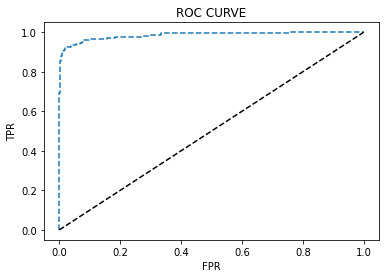

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, '--')
plt.plot([0,1], [0,1], 'k--')
plt.plot([fpr], [tpr], 'r--', ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()



In [27]:
#pip install scikitplot

!pip install scikit-plot

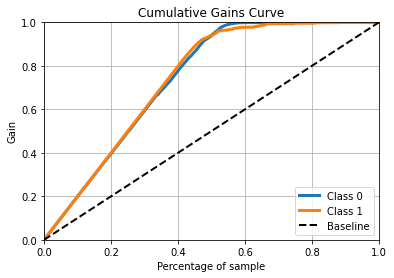

In [ ]:
# Cumulative Gain Curve

import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y_test, logistic.predict_proba(X_test))
plt.show()

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 1, random_state = None)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(X_test)


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56833,30
True[1],0,56863


In [ ]:
# Sensitivity 
sens_dt1 = 56863 / (0+56863)
print("Sensitivity for Decision Tree: ", sens_dt1)

Sensitivity for Decision Tree:  1.0


In [ ]:
# Specificity 

spec_dt1 = 56833 / (56833	+ 30)
print("Specificity for Decision Tree: ", spec_dt1)

Specificity for Decision Tree:  0.9994724161581344


In [ ]:
# Classification Report
print("Classification Report:\n ", classification_report(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
# Accuracy
print("accuracy: %.3f" %accuracy_score(Y_test, y_pred))

accuracy: 1.000


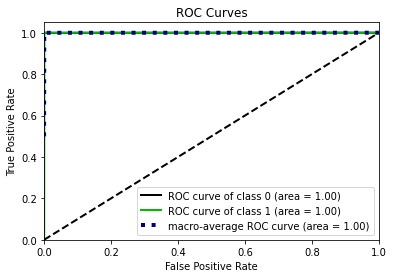

In [ ]:
# ROC Curve
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y_test, tree.predict_proba(X_test), plot_micro = False)
plt.show()

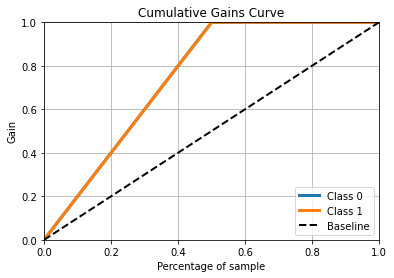

In [ ]:
# Cumulative Gain Curve
skplt.metrics.plot_cumulative_gain(Y_test, tree.predict_proba(X_test))
plt.show()

### **Random Forest**

In [ ]:
# Using Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion = 'gini', max_depth = None, n_estimators = 100, random_state = None)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = forest.predict(X_test)


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56855,8
True[1],0,56863


In [ ]:
# Sensitivity 
sens_rf1 = 56863 / (0+56863)
print("Sensitivity for Decision Tree: ", sens_rf1)

Sensitivity for Decision Tree:  1.0


In [ ]:
# Specificity 
spec_rf1 = 56855 / (56855	+ 8)
print("Specificity for Decision Tree: ", spec_rf1)

Specificity for Decision Tree:  0.9998593109755025


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       1.00      1.00      1.00    113726

    accuracy                           1.00    227452
   macro avg       1.00      1.00      1.00    227452
weighted avg       1.00      1.00      1.00    227452



In [ ]:
# Accuracy

print("accuracy: %.3f" %accuracy_score(Y_test, y_pred))

accuracy: 1.000


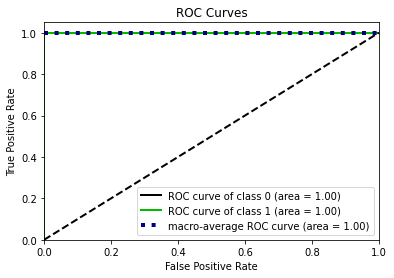

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y_test, forest.predict_proba(X_test), plot_micro = False)
plt.show()

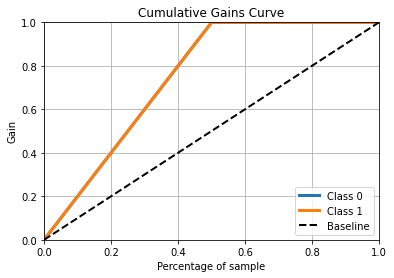

In [ ]:
# Cumulative Gain

skplt.metrics.plot_cumulative_gain(Y_test, forest.predict_proba(X_test))
plt.show()

### **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
bnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
y_pred = bnb.predict(X_test) 
  
# comparing actual response values (Y_test) with predicted response values (Y_pred) 
from sklearn import metrics 
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy(in %): 90.6327488876774


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56445,418
True[1],10235,46628


In [ ]:
# Sensitivity
sens_nb = 46628 / (46628+10235)
print("Sensitivity for Naive Bayes Classifier: ", sens_nb)

Sensitivity for Naive Bayes Classifier:  0.8200059792835411


In [ ]:
# Specificity

spec_nb = 56445 / (56445+418)
print("Sensitivity for Naive Bayes Classifier: ", spec_nb)

Sensitivity for Naive Bayes Classifier:  0.9926489984700069


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.99      0.91     56863
           1       0.99      0.82      0.90     56863

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



In [ ]:
# Accuracy

print("accuracy: %.3f" %accuracy_score(Y_test, y_pred))

accuracy: 0.917


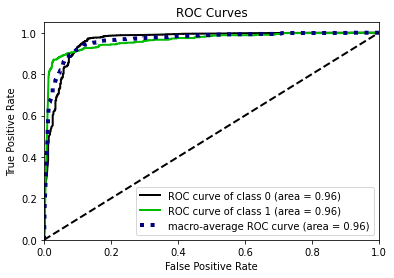

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y_test, gnb.predict_proba(X_test), plot_micro = False)
plt.show()

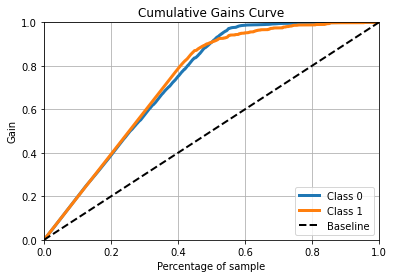

In [ ]:
# Cumulative Gain Curve

skplt.metrics.plot_cumulative_gain(Y_test, gnb.predict_proba(X_test))
plt.show()

### **K Nearest Neighbor(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train) 
  
 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# Accuracy

from sklearn import metrics 
print("KNN accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

KNN accuracy(in %): 99.82941455779681


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56669,194
True[1],0,56863


In [ ]:
# Sensitivity

sens_knn = 56863 / (56863 + 0)
print("Sensitivity for KNN: ", sens_knn)

Sensitivity for KNN:  1.0


In [ ]:
# Specificity

spec_knn = 56669 / (56669+194)
print("Specificity for KNN: ", spec_knn)

Specificity for KNN:  0.9965882911559362


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



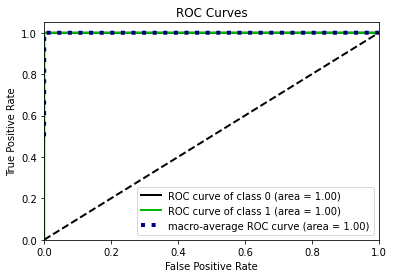

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y_test, knn.predict_proba(X_test), plot_micro = False)
plt.show()

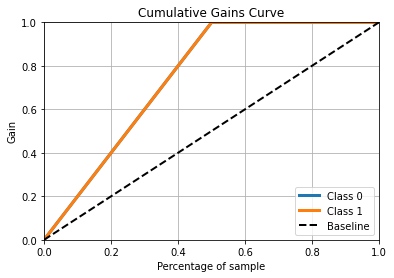

In [ ]:
# Cumulative Gain

skplt.metrics.plot_cumulative_gain(Y_test, knn.predict_proba(X_test))
plt.show()

## **Feature Selection**

In [ ]:
!pip install 

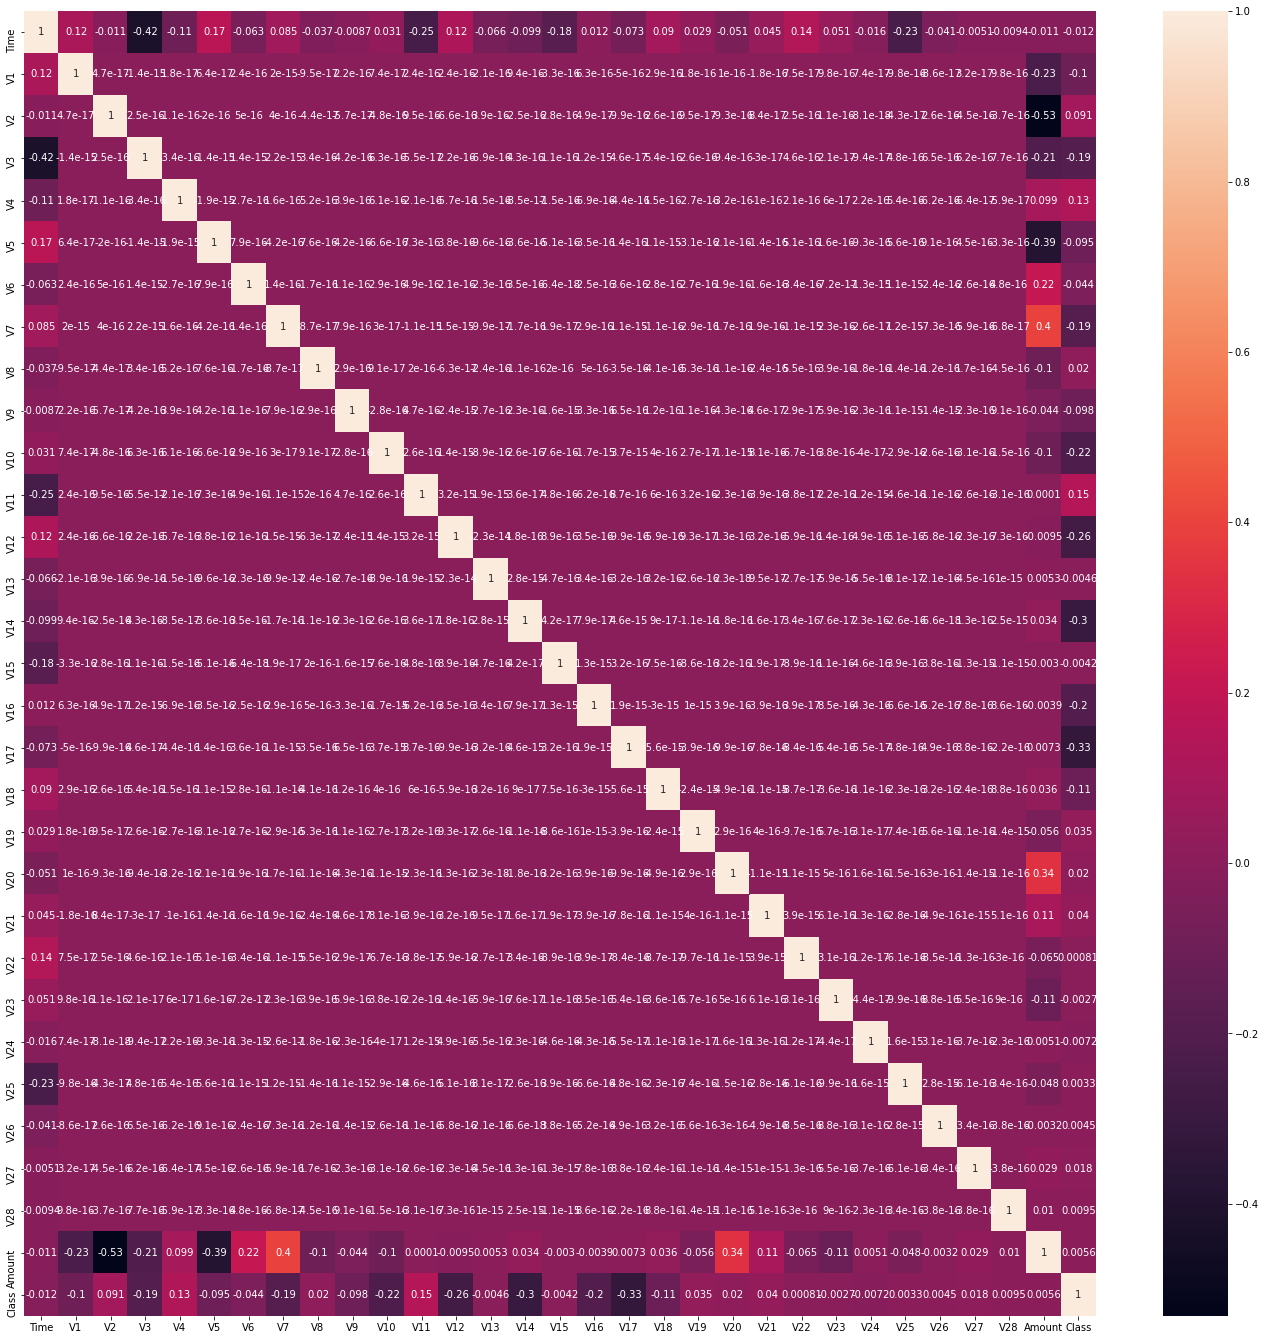

In [ ]:
import pandas as pd 
import seaborn as sn 
import scikitplot as skplt
import matplotlib.pyplot as plt
  
# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (24, 24)) 
  
# Defining index for the dataframe 

corr = data.corr() 
sn.heatmap(corr, annot = True) 

In [ ]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0,0.12,-0.011,-0.42,-0.11,0.17,-0.063,0.085,-0.037,-0.0087,0.031,-0.25,0.12,-0.066,-0.099,-0.18,0.012,-0.073,0.09,0.029,-0.051,0.045,0.14,0.051,-0.016,-0.23,-0.041,-0.0051,-0.0094,-0.011,-0.012
V1,0.12,1.0,4.7e-17,-1.4e-15,1.8e-17,6.4e-17,2.4e-16,2e-15,-9.5e-17,2.2e-16,7.4e-17,2.4e-16,2.4e-16,-2.1e-16,9.4e-16,-3.3e-16,6.3e-16,-5e-16,2.9e-16,1.8e-16,1e-16,-1.8e-16,7.5e-17,9.8e-16,7.4e-17,-9.8e-16,-8.6e-17,3.2e-17,9.8e-16,-0.23,-0.1
V2,-0.011,4.7e-17,1.0,2.5e-16,-1.1e-16,-2e-16,5e-16,4e-16,-4.4e-17,-5.7e-17,-4.8e-16,9.5e-16,-6.6e-16,3.9e-16,-2.5e-16,2.8e-16,4.9e-17,-9.9e-16,2.6e-16,9.5e-17,-9.3e-16,8.4e-17,2.5e-16,1.1e-16,-8.1e-18,-4.3e-17,2.6e-16,-4.5e-16,-3.7e-16,-0.53,0.091
V3,-0.42,-1.4e-15,2.5e-16,1.0,-3.4e-16,-1.4e-15,1.4e-15,2.2e-15,3.4e-16,-4.2e-16,6.3e-16,-5.5e-17,2.2e-16,-6.9e-16,4.3e-16,1.1e-16,1.2e-15,4.6e-17,5.4e-16,2.6e-16,-9.4e-16,-3e-17,4.6e-16,2.1e-17,-9.4e-17,4.8e-16,6.5e-16,6.2e-16,7.7e-16,-0.21,-0.19
V4,-0.11,1.8e-17,-1.1e-16,-3.4e-16,1.0,-1.9e-15,-2.7e-16,1.6e-16,5.2e-16,3.9e-16,6.1e-16,-2.1e-16,-5.7e-16,-1.5e-16,-8.5e-17,-1.5e-16,-6.9e-16,-4.4e-16,1.5e-16,-2.7e-16,-3.2e-16,-1e-16,2.1e-16,6e-17,2.2e-16,5.4e-16,-6.2e-16,-6.4e-17,-5.9e-17,0.099,0.13
V5,0.17,6.4e-17,-2e-16,-1.4e-15,-1.9e-15,1.0,7.9e-16,-4.2e-16,7.6e-16,4.2e-16,-6.6e-16,7.3e-16,3.8e-16,-9.6e-16,-3.6e-16,-5.1e-16,-3.5e-16,1.4e-16,1.1e-15,-3.1e-16,2.1e-16,-1.4e-16,5.1e-16,1.6e-16,-9.3e-16,5.6e-16,9.1e-16,4.5e-16,-3.3e-16,-0.39,-0.095
V6,-0.063,2.4e-16,5e-16,1.4e-15,-2.7e-16,7.9e-16,1.0,1.4e-16,-1.7e-16,1.1e-16,2.9e-16,4.9e-16,2.1e-16,-2.3e-16,3.5e-16,-6.4e-18,-2.5e-16,3.6e-16,2.8e-16,2.7e-16,1.9e-16,-1.6e-16,-3.4e-16,-7.2e-17,-1.3e-15,1.1e-15,-2.4e-16,-2.6e-16,4.8e-16,0.22,-0.044
V7,0.085,2e-15,4e-16,2.2e-15,1.6e-16,-4.2e-16,1.4e-16,1.0,-8.7e-17,7.9e-16,3e-17,-1.1e-15,1.5e-15,-9.9e-17,-1.7e-16,1.9e-17,2.9e-16,1.1e-15,-1.1e-16,-2.9e-16,1.7e-16,1.9e-16,-1.1e-15,2.3e-16,-2.6e-17,1.2e-15,-7.3e-16,-5.9e-16,-6.8e-17,0.4,-0.19
V8,-0.037,-9.5e-17,-4.4e-17,3.4e-16,5.2e-16,7.6e-16,-1.7e-16,-8.7e-17,1.0,2.9e-16,9.1e-17,2e-16,-6.3e-17,-2.4e-16,-1.1e-16,2e-16,5e-16,-3.5e-16,-4.1e-16,-5.3e-16,-1.1e-16,-2.4e-16,5.5e-16,3.9e-16,-1.8e-16,-1.4e-16,-1.2e-16,1.7e-16,-4.5e-16,-0.1,0.02
V9,-0.0087,2.2e-16,-5.7e-17,-4.2e-16,3.9e-16,4.2e-16,1.1e-16,7.9e-16,2.9e-16,1.0,-2.8e-16,4.7e-16,-2.4e-15,-2.7e-16,2.3e-16,-1.6e-15,-3.3e-16,6.5e-16,1.2e-16,1.1e-16,-4.3e-16,4.6e-17,2.9e-17,5.9e-16,-2.3e-16,1.1e-15,-1.4e-15,-2.3e-16,9.1e-16,-0.044,-0.098


##### Printing the features with their Standard Deviation

Feature ranking:
1. feature 14 (0.184331)
2. feature 12 (0.102771)
3. feature 4 (0.098074)
4. feature 17 (0.095453)
5. feature 11 (0.093218)
6. feature 10 (0.054526)
7. feature 16 (0.049635)
8. feature 3 (0.042583)
9. feature 18 (0.034060)
10. feature 9 (0.027973)
11. feature 1 (0.021825)
12. feature 19 (0.021176)
13. feature 7 (0.019028)
14. feature 2 (0.015741)
15. feature 0 (0.012799)
16. feature 6 (0.010614)
17. feature 8 (0.010434)
18. feature 21 (0.010101)
19. feature 13 (0.010093)
20. feature 15 (0.009806)
21. feature 22 (0.009564)
22. feature 26 (0.009323)
23. feature 5 (0.009257)
24. feature 24 (0.008839)
25. feature 20 (0.008562)
26. feature 29 (0.007336)
27. feature 27 (0.007169)
28. feature 25 (0.006766)
29. feature 28 (0.004477)
30. feature 23 (0.004464)


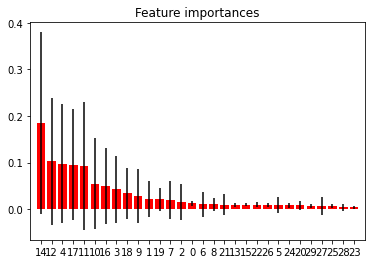

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    #print(X.columns[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Printing the column names from the index number
pos = [14, 12, 4, 17, 11, 10, 16, 3, 18, 9]
colname = data.columns[pos]
print (colname)



Index(['V14', 'V12', 'V4', 'V17', 'V11', 'V10', 'V16', 'V3', 'V18', 'V9'], dtype='object')


#### **Taking the first 10 most important features**

In [22]:
X1 = data_upsampled[['V14', 'V12', 'V4', 'V17', 'V11', 'V10', 'V16', 'V3', 'V18', 'V9']]
Y1 = data_upsampled["Class"]


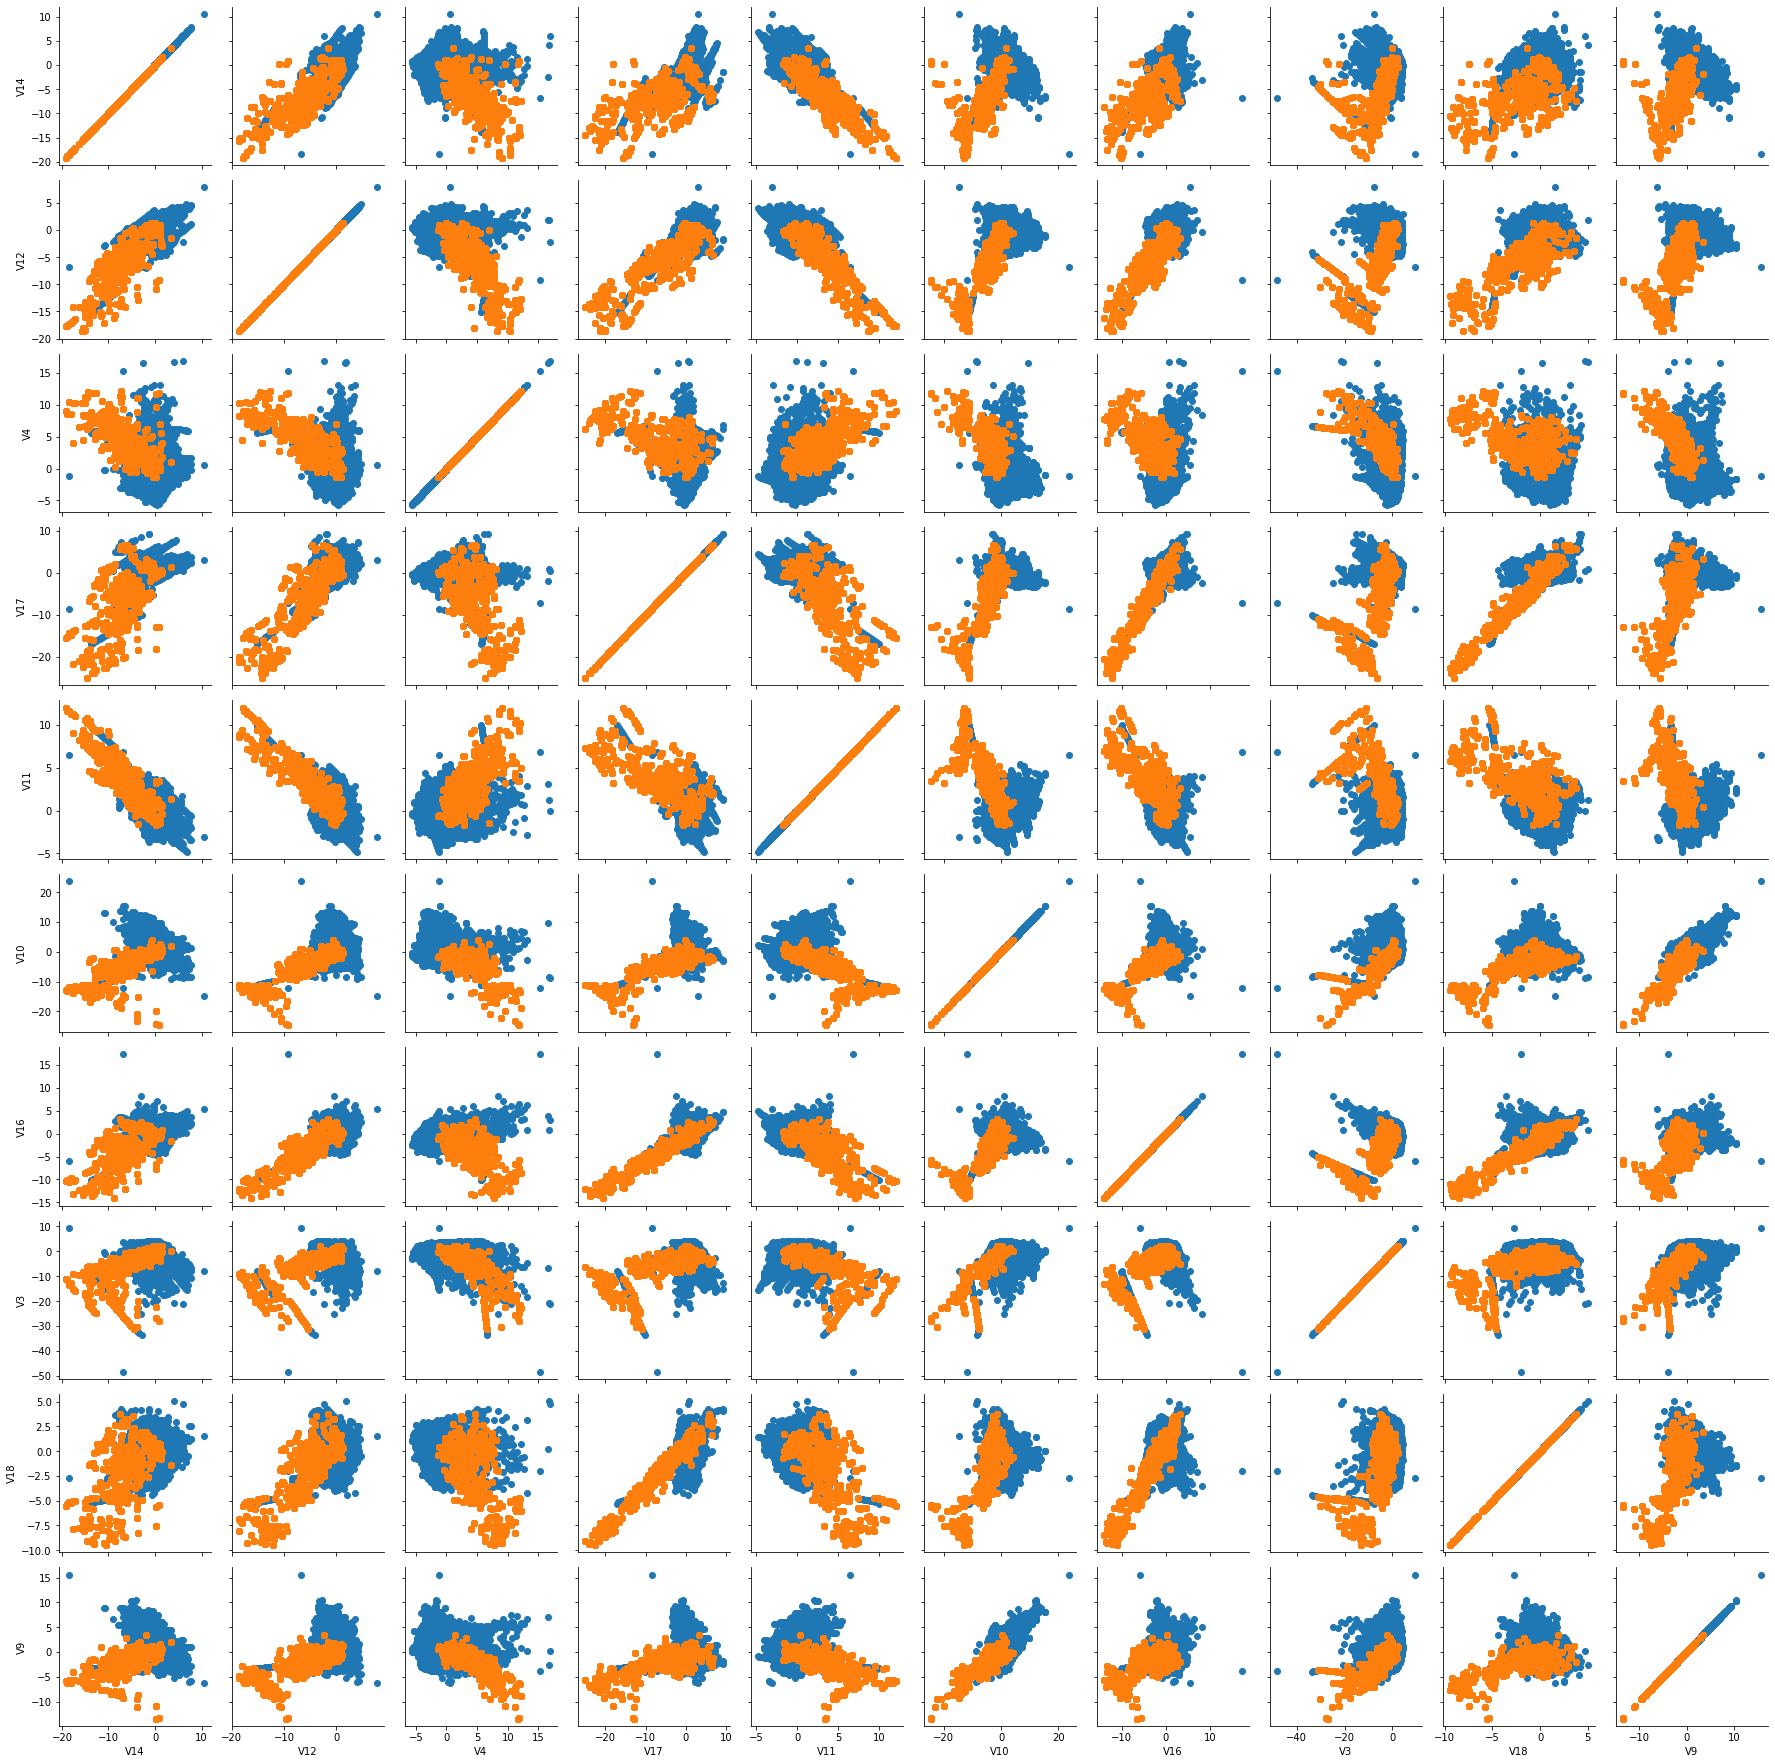

In [ ]:
# Drawing Pairplot
X4 = data_upsampled[['V14', 'V12', 'V4', 'V17', 'V11', 'V10', 'V16', 'V3', 'V18', 'V9', 'Class' ]]
g = sns.PairGrid(data=X4, hue='Class')  
g.map(plt.scatter)  



###### **Drawing boxplots for different columns to check the range**

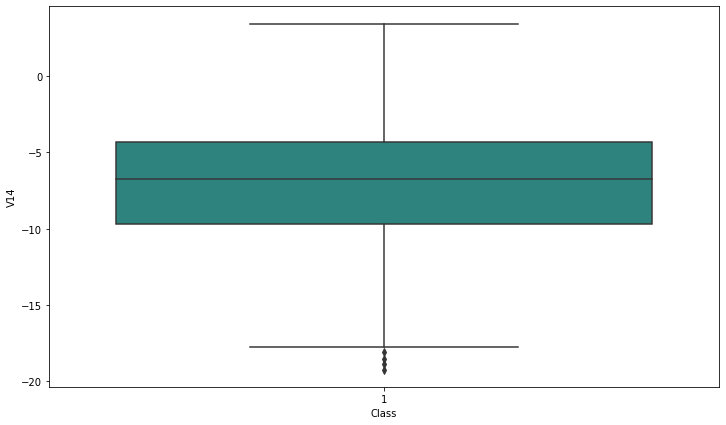

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
#data[data['Class'] == 1].boxplot(column='V14',palette='viridis')
#plt.savefig('plot.png')
sns.boxplot(x='Class',y='V14',data=data[data['Class'] == 1],palette='viridis')

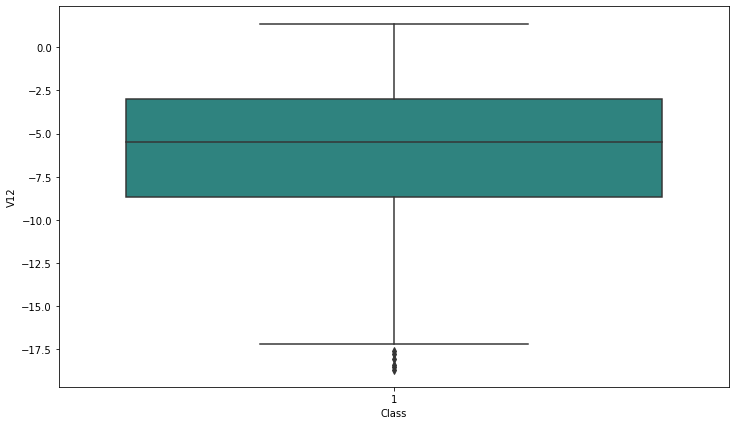

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(12, 7))
#data[data['Class'] == 1].boxplot(column='V14',palette='viridis')
#plt.savefig('plot.png')
sns.boxplot(x='Class',y='V12',data=data[data['Class'] == 1],palette='viridis')

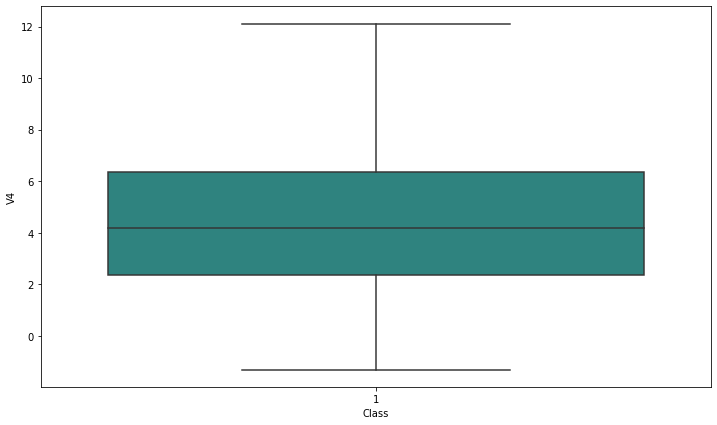

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Class',y='V4',data=data[data['Class'] == 1],palette='viridis')

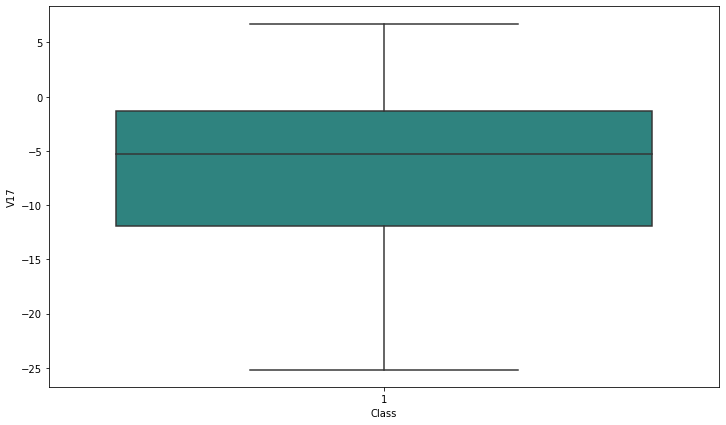

In [ ]:

plt.figure(figsize=(12, 7))
sns.boxplot(x='Class',y='V17',data=data[data['Class'] == 1],palette='viridis')

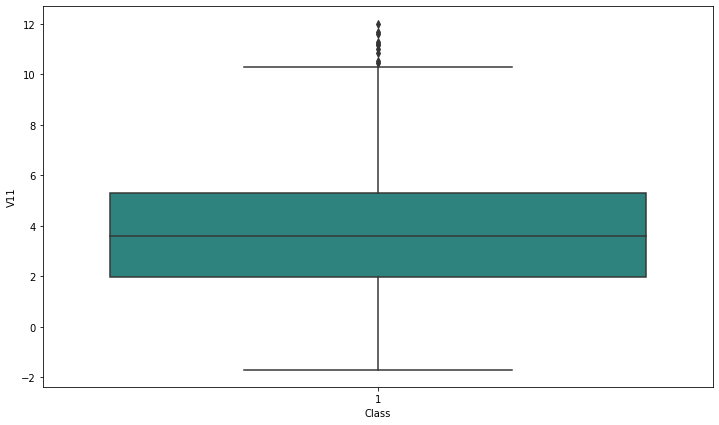

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V11',data=data[data['Class'] == 1],palette='viridis')

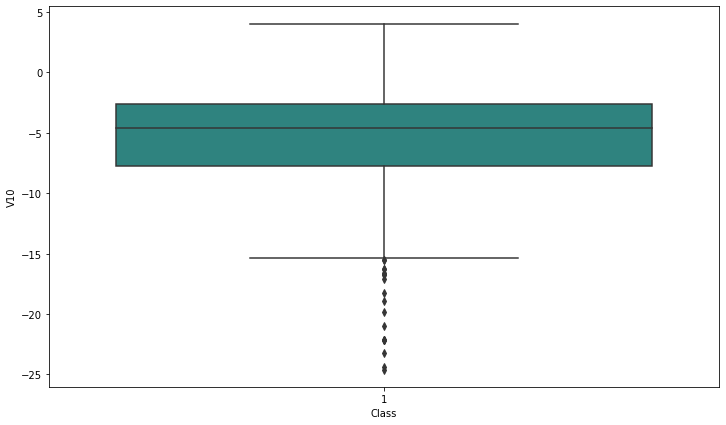

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V10',data=data[data['Class'] == 1],palette='viridis')

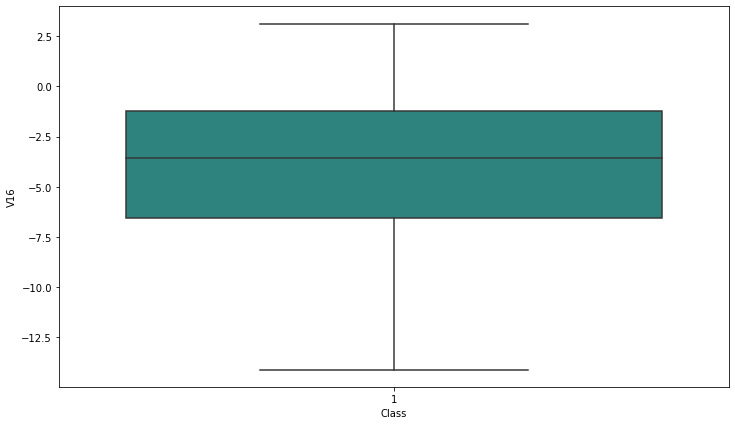

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V16',data=data[data['Class'] == 1],palette='viridis')

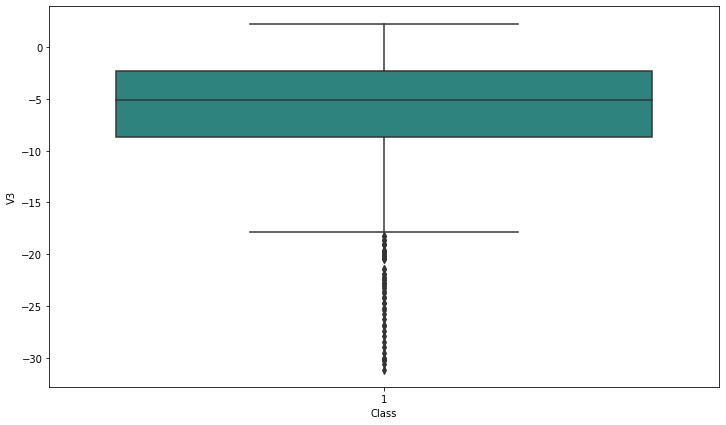

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V3',data=data[data['Class'] == 1],palette='viridis')

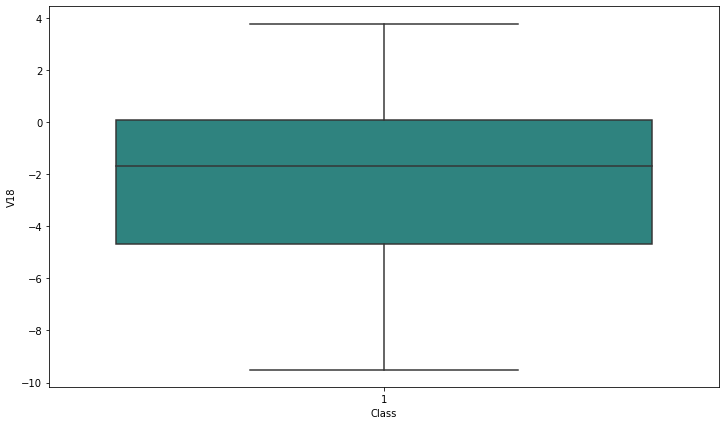

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V18',data=data[data['Class'] == 1],palette='viridis')

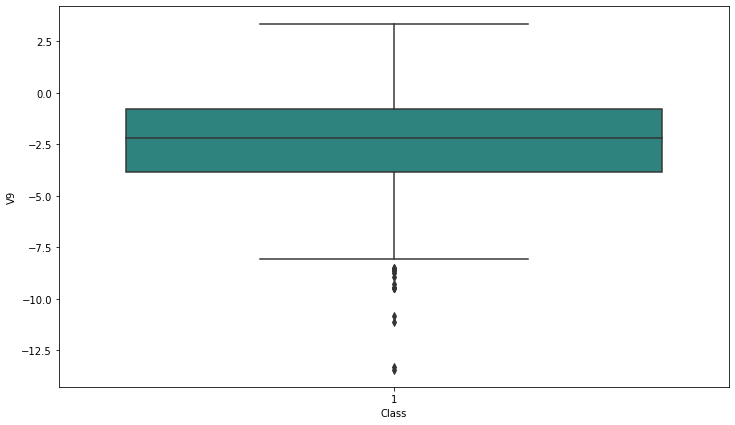

In [ ]:

plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='V9',data=data[data['Class'] == 1],palette='viridis')

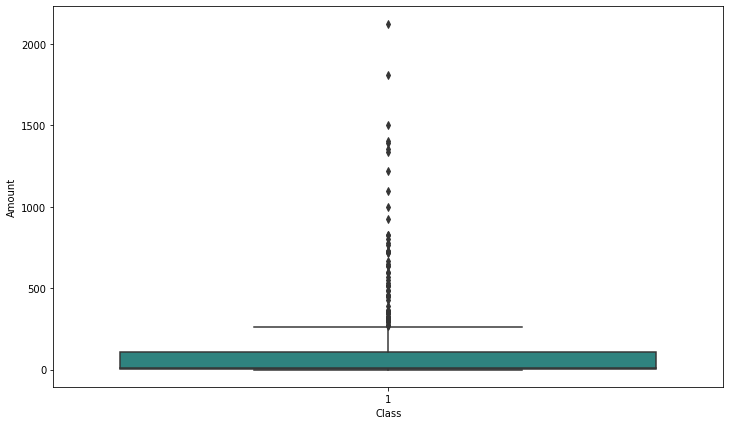

In [ ]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='Class',y='Amount',data=data[data['Class'] == 1],palette='viridis')

##### **Normalizing for the selected features**

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(X1)

In [ ]:
# Printing the shape
X1.shape

(568630, 10)

In [ ]:
Y1.shape

(568630,)

#### **Splitting into Testing and Training dataset.** 
##### Taking 20% data for Testing

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1, stratify = Y1 )

## **Implementing the models with Selected Features**

### **Logistic Regression**

In [ ]:
logistic = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.001, random_state = 1)
logistic.fit(X1_train, Y1_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1 = logistic.predict(X1_test)

In [ ]:
# Accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score


print('The accuracy of Logistic Regression is :', accuracy_score(Y1_test, y_pred1))

The accuracy of Logistic Regression is : 0.9408930235829978


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y1_test, y_pred1), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],55577,1286
True[1],5436,51427


In [ ]:
# Sensitivity
sens_lr1 = 51427 / (51427+5436)
print("Sensitivity for Logistic Regresion: ", sens_lr1)

Sensitivity for Logistic Regresion:  0.9044018078539648


In [ ]:
# Specificity
spec_lr1 = 55577 / (55577	+ 1286)
print("Specificity for Logistic Regresion: ", spec_lr1)

Specificity for Logistic Regresion:  0.9773842393120307


In [ ]:
# Classification Report
print("Classification Report:\n ", classification_report(Y1_test, y_pred1))

Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.98      0.94     56863
           1       0.98      0.90      0.94     56863

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y1_test, logistic.predict_proba(X1_test)[:,1])

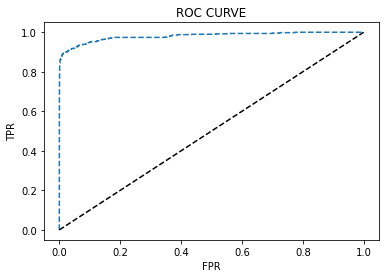

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, '--')
plt.plot([0,1], [0,1], 'k--')
plt.plot([fpr], [tpr], 'r--', ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()



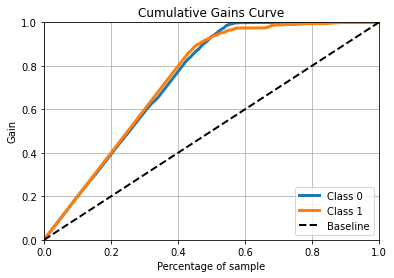

In [ ]:
# Cumulative Gain Curve
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y1_test, logistic.predict_proba(X1_test))
plt.show()

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree1 = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 1, random_state = None)
tree1.fit(X1_train, Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred1 = tree1.predict(X1_test)


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y1_test, y_pred1), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56833,30
True[1],0,56863


In [ ]:
# Sensitivity
sens_dt1 = 56863 / (0+56863)
print("Sensitivity for Decision Tree: ", sens_dt1)

Sensitivity for Decision Tree:  1.0


In [ ]:
# Specificity
spec_dt1 = 56833 / (56833	+ 30)
print("Specificity for Decision Tree: ", spec_dt1)

Specificity for Decision Tree:  0.9994724161581344


In [ ]:
# Classification Report
print("Classification Report:\n ", classification_report(Y1_test, y_pred1))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
# Accuracy
print("accuracy: %.3f" %accuracy_score(Y1_test, y_pred1))

accuracy: 1.000


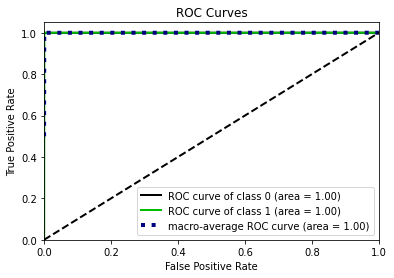

In [ ]:
# ROC Curve
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y1_test, tree1.predict_proba(X1_test), plot_micro = False)
plt.show()

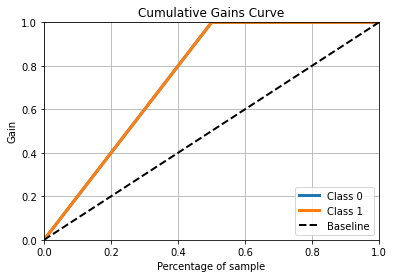

In [ ]:
# Cumulative Gain Curve
skplt.metrics.plot_cumulative_gain(Y1_test, tree1.predict_proba(X1_test))
plt.show()

### **Random Forest**

In [ ]:
# Using Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier


forest1 = RandomForestClassifier(criterion = 'gini', max_depth = None, n_estimators = 100, random_state = None)
forest1.fit(X1_train, Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred1 = forest1.predict(X1_test)


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y1_test, y_pred1), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56856,7
True[1],0,56863


In [ ]:
# Sensitivity
sens_rf2 = 56863 / (0+56863)
print("Sensitivity for Random Forest: ", sens_rf2)

Sensitivity for Random Forest:  1.0


In [ ]:
# Specificity
spec_rf2 = 56856 / (56856	+ 7)
print("Specificity for Random Forest: ", spec_rf2)

Specificity for Random Forest:  0.9998768971035648


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y1_test, y_pred1))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
# Accuracy

print("accuracy: %.3f" %accuracy_score(Y1_test, y_pred1))

accuracy: 1.000


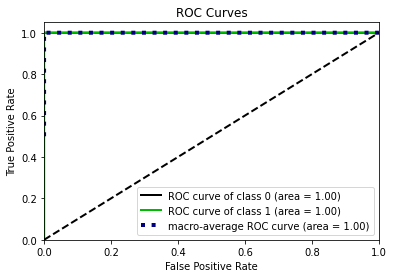

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y1_test, forest1.predict_proba(X1_test), plot_micro = False)
plt.show()

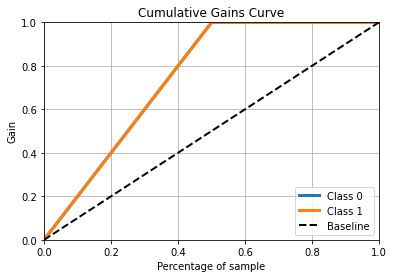

In [ ]:
# Cumulative Gain

skplt.metrics.plot_cumulative_gain(Y1_test, forest1.predict_proba(X1_test))
plt.show()

### **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB 
bnb1 = BernoulliNB() 
bnb1.fit(X1_train, Y1_train) 
  
# making predictions on the testing set 
y_pred1 = bnb1.predict(X1_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y1_test, y_pred1)*100)


Bernoulli Naive Bayes model accuracy(in %): 91.6914337970209


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y1_test, y_pred1), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56009,854
True[1],8595,48268


In [ ]:
# Sensitivity 
sens_nb2 = 48268 / (48268+8595)
print("Sensitivity for Naive Bayes Classifier: ", sens_nb2)

Sensitivity for Naive Bayes Classifier:  0.8488472293055238


In [ ]:
# Specificity 
spec_nb2 = 56009 / (56009+854)
print("Specificity for Naive Bayes Classifier: ", spec_nb2)

Specificity for Naive Bayes Classifier:  0.9849814466348944


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y1_test, y_pred1))

Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.98      0.92     56863
           1       0.98      0.85      0.91     56863

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



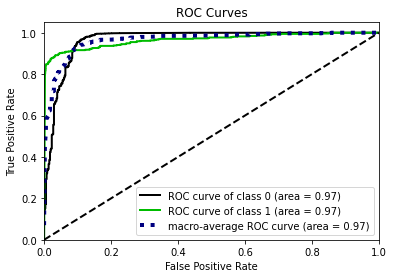

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y1_test, gnb1.predict_proba(X1_test), plot_micro = False)
plt.show()

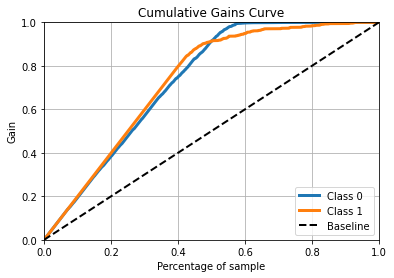

In [ ]:
# Cumulative Gain

skplt.metrics.plot_cumulative_gain(Y1_test, gnb1.predict_proba(X1_test))
plt.show()

### **K Nearest Neighbor(KNN)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X1_train, Y1_train) 
  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
# making predictions on the testing set 
y_pred1 = knn1.predict(X1_test) 
  


In [ ]:
# Accuracy
from sklearn import metrics 
print("KNN model accuracy(in %):", metrics.accuracy_score(Y1_test, y_pred1)*100)


KNN model accuracy(in %): 99.91822450451085


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, make_scorer, roc_curve 

confmat = pd.DataFrame(confusion_matrix(Y1_test, y_pred1), index = ['True[0]', 'True[1]'], columns = ['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],56770,93
True[1],0,56863


In [ ]:
# Sensitivity 
sens_knn1 = 56863 / (56863+0)
print("Sensitivity for KNN: ", sens_knn1)

Sensitivity for KNN:  1.0


In [ ]:
# Specificity 
spec_knn1 = 56770 / (56770+93)
print("Specificity for KNN: ", spec_knn1)

Specificity for KNN:  0.9983644900902169


In [ ]:
# Classification Report

print("Classification Report:\n ", classification_report(Y1_test, y_pred1))

Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



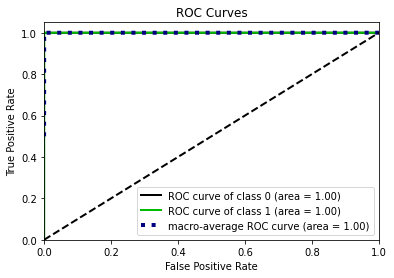

In [ ]:
# ROC Curve

import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc(Y1_test, knn1.predict_proba(X1_test), plot_micro = False)
plt.show()

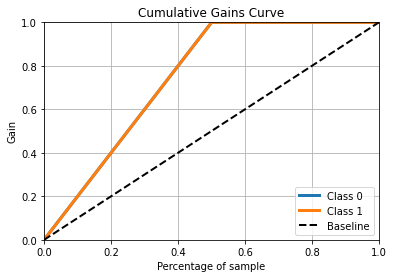

In [29]:
# Cumulative Gain

import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_cumulative_gain(Y1_test, knn1.predict_proba(X1_test))
plt.show()